# TITLE
### Christin Wang, Manan Shah, Shreya Ladva, Samuel Griffin

In [ ]:
library(readxl)
library(tidyverse)
library(haven)
library(dplyr)
library(scales)
library(stargazer)
library(car)
library(GGally)
library(ggplot2)
library(ggcorrplot)
library(estimatr)
library(sandwich)
library(stargazer)

Warning message:
"程辑包'readxl'是用R版本4.3.3 来建造的"
Warning message:
"程辑包'tidyverse'是用R版本4.3.3 来建造的"
Warning message:
"程辑包'ggplot2'是用R版本4.3.3 来建造的"
Warning message:
"程辑包'forcats'是用R版本4.3.3 来建造的"
Warning message:
"程辑包'lubridate'是用R版本4.3.3 来建造的"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"程辑包'haven'是用R版本4.3.3 来建造的"
Warning message:
"程辑包'scales'是用R版本4.3.3 来建造的"

载入程辑包：'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col

# 2.Data Preperation

In [82]:
url <- "https://raw.githubusercontent.com/Speculatorrr/ECON326/d0e554d0459664e17c4489ca8c08f9e1f0e2406c/Student%20Performance%20Survey%20-%20March%202025.xlsx"
temp_file <- tempfile(fileext = ".xlsx")
download.file(url, temp_file, mode = "wb")
df_ <- read_excel(temp_file)

In [83]:
colnames(df_) <- c(
    "GPA_percent", "GPA_scale", "single_study", "all_study", "exam_prepare",
    "course_take", "course_preference", "AI_use", "AI_help", "review",
    "hw", "sport", "club", "volunteer", "friend",
    "family", "student", "tuition", "aid", "aid_coverage",
    "job", "work", "finance", "sleep", "media",
    "screen", "anxiety", "commute", "transport", "course_mode",
    "future_work","future_edu", "confidence", "career", "faculty", 
    "ethnicity", "year")

1. `GPA_percent`: What is your current cumulative GPA (on a percentage scale)? Example: 75%  
2. `GPA_scale`: What is your current GPA on a 4.0 scale (if known)? Example: 3.51  
3. `single_study`: How many hours per week do you study for this course? Example: 9  
4. `all_study`: How many total hours per week do you study across all your courses? Example: 21  
5. `exam_prepare`: How many hours do you spend preparing for exams (excluding regular coursework)? Example: 8  
6. `course_take`: How many courses do you take on average per term? Example: 4  
7. `course_preference`: Do you prefer courses that focus more on practical applications or theoretical concepts?  
8. `AI_use`: How many hours per week do you use ChatGPT or other LLM or AI tools for studying or assignments? Example: 12  
9. `AI_help`: How do you feel AI tools like ChatGPT impact your learning? (5 = Strongly helps, 1 = Strongly harms)  
10. `review`: How much time per week do you spend on reviewing lecture slides and course materials? Example: 6  
11. `hw`: How much time per week do you spend on assignments, problem sets, and practice exercises? Example: 5  
12. `sport`: How many hours per week do you spend on sports or fitness activities? Example: 4  
13. `club`: How many hours per week do you spend on student clubs or societies? Example: 5  
14. `volunteer`: How many hours per week do you spend on volunteering or community service? Example: 3  
15. `friend`: How many hours per week do you spend socializing with friends? Example: 6  
16. `family`: How many hours per week do you spend socializing with family (online and in-person together)? Example: 8  
17. `student`: Are you an international, domestic, or exchange student? If you are an exchange student, just choose "Exchange" below.  
18. `tuition`: What is your average tuition fee per course? Example: 3200  
19. `aid`: Do you receive any scholarships or financial aid?  
20. `aid_coverage`: If you receive scholarships or financial aid, what percentage of your tuition does it cover? Example: 50%. If you do not get a scholarship or financial aid, just enter "0".  
21. `job`: Do you currently have a job while studying?  
22. `work`: How many hours per week do you work? Example: 12. Put "0" if you are not working.  
23. `finance`: Do you feel that your financial situation affects your academic performance? (5 = Significantly affects, 1 = No impact at all)  
24. `sleep`: How many hours of sleep do you get on an average night? Example: 6  
25. `media`: How much time do you spend daily on social media (in minutes)? Example: 200  
26. `screen`: How much time do you spend daily on screens (computer, phone, TV) for non-academic purposes (in minutes)? Example: 120  
27. `anxiety`: How often do you feel depressed or anxious these days? (5 = Very frequently, 1 = Never)  
28. `commute`: How long is your commute to campus (one way, in minutes)? Example: 25. If you live on campus, just write the walk time on average in minutes to your classes.  
29. `transport`: What is your primary mode of transportation to campus?  
30. `course_mode`: Do you prefer taking online courses, in-person courses, or a hybrid of both?
30. `future_work`: How often do you think about your future employment or career prospects? (5 = Constantly, 1 = Never)  
31. `future_edu`: Do you plan to pursue further education (graduate school, professional certification, etc.)?  
32. `confidence`: How confident are you in securing a job related to your field of study after graduation? (5 = Very confident, 1 = Not confident at all)  
33. `career`: Which career path are you most likely to pursue after graduation? (Select the option that best matches your current career goal)  
34. `faculty`: Which faculty are you in? (Select the faculty that best matches your program of study). Faculty of Arts is very vast so please google or use AI.  
35. `ethnicity`: What is your ethnicity?  
36. `year`: Which year are you in at your undergraduate program at UBC? (1 = First Year, 5 = Fifth Year or beyond)

In [84]:
df_$GPA_percent <- as.numeric(gsub("%", "", df_$GPA_percent))
df_$aid_coverage <- as.numeric(gsub("%", "", df_$aid_coverage))

df_[, c(1:6, 8:16, 18, 20, 22:28, 31, 33, 37)] <- 
  lapply(df_[, c(1:6, 8:16, 18, 20, 22:28, 31, 33, 37)], function(x) as.numeric(as.character(x)))

df_[] <- lapply(df_, function(x) {
  if (is.character(x)) as.factor(x) else x
})

df$course_take <- factor(round(df$course_take))
df <- filter(df, (student != "Domestic (Canadian student)" | (tuition >= 300 & tuition <= 1000)) 
                  & tuition != 0)
df <- drop_na(df)
head(df)

Warning message:
"强制改变过程中产生了NA"
Warning message:
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"


Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"
Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"


GPA_percent,GPA_scale,single_study,all_study,exam_prepare,course_take,course_preference,AI_use,AI_help,review,⋯,commute,transport,course_mode,future_work,future_edu,confidence,career,faculty,ethnicity,year
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>
86.0,3.76,8,30,30,5,More practical applications,1,5,2,⋯,25,Public transit,Hybrid (mix of both),3,Yes,3,"Finance, Banking, or Investment",Faculty of Arts,East Asian,3
78.6,3.38,1,5,4,5,More practical applications,2,5,1,⋯,20,Walking,Online courses,5,Unsure,1,"Finance, Banking, or Investment",Faculty of Commerce and Business Administration (Sauder School of Business),East Asian,3
74.9,3.10,4,20,20,5,More practical applications,5,5,5,⋯,25,Public transit,Hybrid (mix of both),5,No,3,"Finance, Banking, or Investment",Faculty of Arts,East Asian,2
78.0,3.50,7,35,20,5,More practical applications,2,4,10,⋯,25,Public transit,In-person courses,4,Yes,4,"Finance, Banking, or Investment",Faculty of Arts,White,2
79.4,3.50,4,20,8,4,More practical applications,4,4,2,⋯,5,Biking,Hybrid (mix of both),5,No,4,Date Science or AI,Faculty of Arts,South Asian,2
74.0,3.00,1,4,7,5,More theoretical concepts,1,4,1,⋯,90,Public transit,Hybrid (mix of both),4,Unsure,2,"Finance, Banking, or Investment",Faculty of Arts,East Asian,3


In [5]:
#ggpairs(df[, c(1:6, 8:16, 18, 20, 22:28, 31, 33, 37)] )

In [6]:
#ggpairs(df)

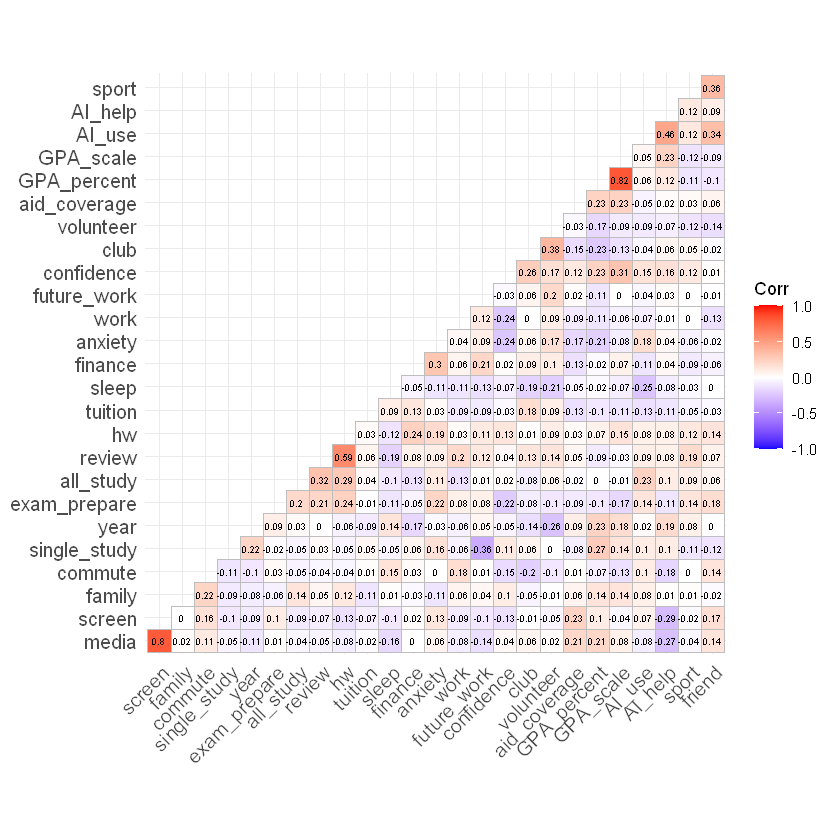

In [86]:
numeric_vars <- df[, c(1:5, 8:16, 18, 20, 22:28, 31, 33, 37)]

cor_matrix <- cor(numeric_vars, use = "pairwise.complete.obs")

cor_plot <- ggcorrplot(cor_matrix, hc.order = TRUE, type = "lower",
           lab = TRUE, lab_size = 2, colors = c("blue", "white", "red")) 


cor_plot

In [54]:
key_var <- df[,c(1,4,18)]
summary(key_var)

  GPA_percent       all_study       tuition     
 Min.   : 60.00   Min.   : 4.0   Min.   :  350  
 1st Qu.: 72.00   1st Qu.:15.0   1st Qu.:  800  
 Median : 76.65   Median :20.0   Median : 4200  
 Mean   : 77.21   Mean   :20.2   Mean   : 4004  
 3rd Qu.: 80.70   3rd Qu.:25.0   3rd Qu.: 4739  
 Max.   :100.00   Max.   :60.0   Max.   :47500  

# 4.Model Specification
## 4.1 Study hours
- Variabe of interest: total study hours per week across all courses.
- Omitted causal effects:
    - Tuition fee, students may study harder due to higher tuition
    - Course load
    - Sleep hours
    - Employment, if a student works more, they may have less time to study
    - Study effort (can be controlled by social media hours)
    - Psychological factors (controlled by anxiety level)
    - Help received (controlled by AI_usage)
    
- Plausible alternative models: 
    It isn't clear which study related variables control best for study effort. As previous studies mentioned social media hours would affect study efficiency, alternative specifications may also include exam preperation hours, review hours and homework writing hours. Besides, other than work hours, other activities may also decrease study hours, like club participation, volunteer hours, family and friend socalizing events.

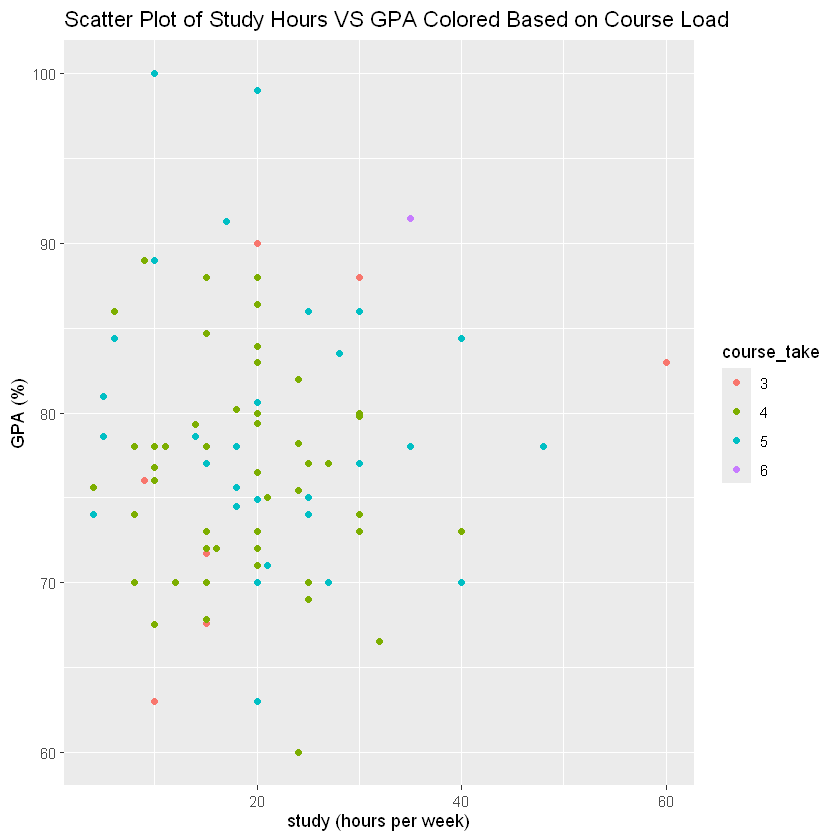

In [87]:
study <- df |>
    ggplot(aes(x = all_study, y = GPA_percent, color = course_take))+
    geom_point()+
    xlab("study (hours per week)") +
    ylab("GPA (%)")+
    ggtitle("Scatter Plot of Study Hours VS GPA Colored Based on Course Load")
study

I drew this graph based on course load becuase I think more courses may indicate more study hours.

In [88]:
r1a <- lm(GPA_percent ~ all_study, data = df)
r2a <- lm(GPA_percent ~ all_study + course_take, data = df)
r3a <- lm(GPA_percent ~ all_study + course_take + sleep, data = df)
r4a <- lm(GPA_percent ~ all_study + course_take + sleep + work, data = df)
r5a <- lm(GPA_percent ~ all_study + course_take + sleep + work + media, data = df)
r6a <- lm(GPA_percent ~ all_study + course_take + sleep + work + media + anxiety, data = df)
r7a <- lm(GPA_percent ~ all_study + course_take + sleep + work + media + anxiety + AI_use, data = df)

se1 <- sqrt(diag(vcovHC(r1a, type="HC1")))
se2 <- sqrt(diag(vcovHC(r2a, type="HC1")))
se3 <- sqrt(diag(vcovHC(r3a, type="HC1")))
se4 <- sqrt(diag(vcovHC(r4a, type="HC1")))
se5 <- sqrt(diag(vcovHC(r5a, type="HC1")))
se6 <- sqrt(diag(vcovHC(r6a, type="HC1")))
se7 <- sqrt(diag(vcovHC(r7a, type="HC1")))

ses <- list(se1, se2, se3, se4, se5, se6, se7)

stargazer(r1a, r2a, r3a, r4a, r5a, r6a, r7a, 
          se = ses,
          title = "Comparison of Regression Results",
          align = TRUE, 
          type = "text", 
          keep.stat = c("n", "rsq"))


Comparison of Regression Results
                                      Dependent variable:                         
             ---------------------------------------------------------------------
                                          GPA_percent                             
                (1)       (2)       (3)       (4)       (5)       (6)       (7)   
----------------------------------------------------------------------------------
all_study      0.003    -0.039    -0.041    -0.057    -0.047    -0.028    -0.045  
              (0.072)   (0.073)   (0.074)   (0.076)   (0.079)   (0.085)   (0.090) 
                                                                                  
course_take4            -1.234    -1.139    -1.784    -2.284    -2.370    -2.809  
                        (3.975)   (3.958)   (3.899)   (3.882)   (3.485)   (3.471) 
                                                                                  
course_take5             1.642     1.745     1.305   